In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#### We generate the data

In [37]:
observations = 1000

x = np.random.uniform(-10,10,(observations,1))
z = np.random.uniform(-10,10,(observations,1))

gen_inputs = np.column_stack((x,z))

noise = np.random.uniform(-1,1,(observations,1))

gen_targets = 2*x -3*z + 5 + noise

np.savez('TF_Sample',inputs = gen_inputs, targets = gen_targets) # This saves the generated data in a .npz file

#### Load the data and build the model

In [38]:
training_data = np.load('TF_Sample.npz')

input_size = 2 # Because there are two input variables
output_size = 1

# To further custimize this model, we can initialize the weights and biases just as we did with numpy
model = tf.keras.Sequential([tf.keras.layers.Dense(output_size, 
                                                   kernel_initializer = tf.random_uniform_initializer
                                                  (-0.1, 0.1),
                                                   bias_initializer = tf.random_uniform_initializer
                                                   (-0.1, 0.1))]) # This allows us to build and define the model

# We can also define the learning rate for the optimization algorithm
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)


In [39]:
model.compile(optimizer = custom_optimizer, loss = 'mean_squared_error') # We specify the objective function and optimization
# algorithm. Here we use the stochastic gradient descent and L2-norm loss per obervation

model.fit(training_data['inputs'],training_data['targets'],epochs = 200, verbose = 2)

Train on 1000 samples
Epoch 1/200
1000/1000 - 0s - loss: 40.9814
Epoch 2/200
1000/1000 - 0s - loss: 1.1024
Epoch 3/200
1000/1000 - 0s - loss: 0.4782
Epoch 4/200
1000/1000 - 0s - loss: 0.4020
Epoch 5/200
1000/1000 - 0s - loss: 0.4161
Epoch 6/200
1000/1000 - 0s - loss: 0.3776
Epoch 7/200
1000/1000 - 0s - loss: 0.3941
Epoch 8/200
1000/1000 - 0s - loss: 0.3901
Epoch 9/200
1000/1000 - 0s - loss: 0.3747
Epoch 10/200
1000/1000 - 0s - loss: 0.3808
Epoch 11/200
1000/1000 - 0s - loss: 0.3550
Epoch 12/200
1000/1000 - 0s - loss: 0.3745
Epoch 13/200
1000/1000 - 0s - loss: 0.3848
Epoch 14/200
1000/1000 - 0s - loss: 0.3733
Epoch 15/200
1000/1000 - 0s - loss: 0.3534
Epoch 16/200
1000/1000 - 0s - loss: 0.3644
Epoch 17/200
1000/1000 - 0s - loss: 0.4128
Epoch 18/200
1000/1000 - 0s - loss: 0.3844
Epoch 19/200
1000/1000 - 0s - loss: 0.3782
Epoch 20/200
1000/1000 - 0s - loss: 0.3767
Epoch 21/200
1000/1000 - 0s - loss: 0.4009
Epoch 22/200
1000/1000 - 0s - loss: 0.4054
Epoch 23/200
1000/1000 - 0s - loss: 0.38

1000/1000 - 0s - loss: 0.3985
Epoch 190/200
1000/1000 - 0s - loss: 0.3923
Epoch 191/200
1000/1000 - 0s - loss: 0.3768
Epoch 192/200
1000/1000 - 0s - loss: 0.3622
Epoch 193/200
1000/1000 - 0s - loss: 0.3852
Epoch 194/200
1000/1000 - 0s - loss: 0.3818
Epoch 195/200
1000/1000 - 0s - loss: 0.3834
Epoch 196/200
1000/1000 - 0s - loss: 0.3886
Epoch 197/200
1000/1000 - 0s - loss: 0.4140
Epoch 198/200
1000/1000 - 0s - loss: 0.4179
Epoch 199/200
1000/1000 - 0s - loss: 0.3736
Epoch 200/200
1000/1000 - 0s - loss: 0.4202


#### Extract the weights and biases

In [40]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
weights

array([[ 2.0397794],
       [-3.029603 ]], dtype=float32)

In [41]:
bias

array([5.003427], dtype=float32)

In [42]:
# Let us examine the outputs with the the targets using the trained model
np.round(model.predict_on_batch(training_data['inputs']),1)

array([[ -3.3],
       [-22.8],
       [  1.9],
       [ 11.3],
       [  1.4],
       [  8.1],
       [  2.3],
       [-20.9],
       [ 22.7],
       [ 37.7],
       [ -3.8],
       [  1.9],
       [-34.1],
       [ 17.8],
       [ 21.4],
       [ 11.2],
       [ -3. ],
       [-20.5],
       [  6.3],
       [  7. ],
       [-10.2],
       [-10.6],
       [ 24.6],
       [-27.5],
       [ -3.6],
       [ 25.1],
       [ 17.7],
       [-39.8],
       [ -3. ],
       [ -9.3],
       [ 15.2],
       [  5.6],
       [ 37.6],
       [  2.3],
       [ 43.4],
       [ 41.1],
       [ 43. ],
       [ -5.3],
       [ 28.6],
       [ -7.3],
       [-16. ],
       [-34. ],
       [ 36.9],
       [ 14.1],
       [  0.3],
       [ 23. ],
       [  9.1],
       [  9.3],
       [-16.8],
       [ 43. ],
       [ 11.5],
       [ 43.9],
       [  2.7],
       [-10.6],
       [-39.8],
       [-25.5],
       [ 13.6],
       [ 14.3],
       [-26.6],
       [ 21.3],
       [ 24.3],
       [ 25.6],
       [

In [43]:
np.round(training_data['targets'],1)

array([[ -2.4],
       [-21.7],
       [  2.7],
       [ 11.3],
       [  1.8],
       [  8.7],
       [  1.8],
       [-21.3],
       [ 22.1],
       [ 37.5],
       [ -3.9],
       [  2.6],
       [-32.8],
       [ 16.9],
       [ 21.5],
       [ 11.2],
       [ -2.2],
       [-20.3],
       [  6.9],
       [  7.6],
       [ -9.8],
       [-11. ],
       [ 24.9],
       [-26.2],
       [ -3.6],
       [ 24.8],
       [ 17.3],
       [-38.2],
       [ -3. ],
       [ -9.5],
       [ 15.7],
       [  4.7],
       [ 36.3],
       [  2.2],
       [ 43.6],
       [ 40.2],
       [ 41.6],
       [ -4.7],
       [ 27.5],
       [ -7. ],
       [-15.1],
       [-33.6],
       [ 35.7],
       [ 13.6],
       [ -0.8],
       [ 22. ],
       [  8.1],
       [  9.4],
       [-16.4],
       [ 42.3],
       [ 12.3],
       [ 43.2],
       [  1.9],
       [-11.1],
       [-39.9],
       [-25.1],
       [ 12.7],
       [ 14.9],
       [-25.6],
       [ 22.1],
       [ 23.3],
       [ 24.7],
       [

#### Plot the outputs against the targets

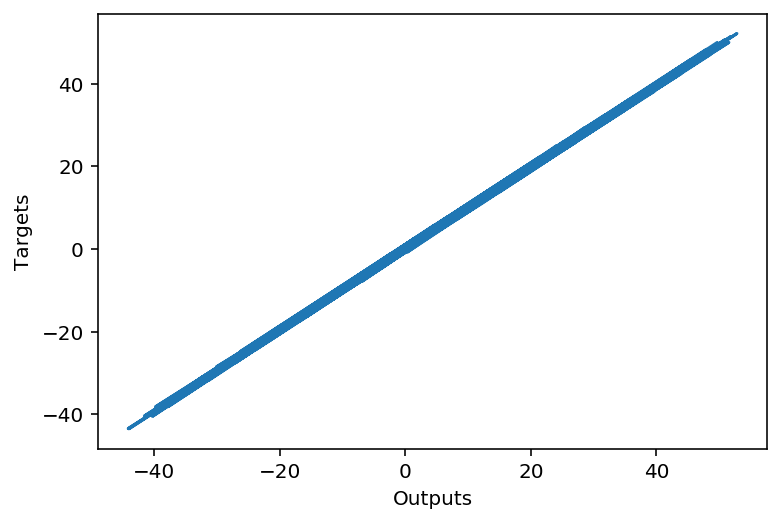

In [44]:
# We take out the 1-d entries in the matrix in order to plot our data with a list 
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()

In [45]:
# We can see that the plot is close to a 45-degree line